In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 48s 1us/step


In [4]:
PATH

'/home/andrija/.keras/datasets/cats_and_dogs_filtered'

In [18]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print(train_dir)
print(validation_dir)

/home/andrija/.keras/datasets/cats_and_dogs_filtered/train
/home/andrija/.keras/datasets/cats_and_dogs_filtered/validation


In [19]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [20]:
num_cats_train = len(os.listdir(train_cats_dir))
num_cats_validation = len(os.listdir(validation_cats_dir))

num_dogs_train = len(os.listdir(train_dogs_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_validation = num_cats_validation + num_dogs_validation

print(num_cats_train, num_cats_validation)
print(num_dogs_train, num_dogs_validation)
print(total_train, total_validation)

1000 500
1000 500
2000 1000


In [23]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [24]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_image_generator

In [25]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='binary'
)
train_data_gen

Found 2000 images belonging to 2 classes.


In [26]:
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='binary'
)
val_data_gen

Found 2000 images belonging to 2 classes.


In [32]:
sample_train_images, sample_train_labels =  next(train_data_gen)
print(sample_train_images.shape)
print(sample_train_labels.shape)
print(np.unique(sample_train_labels))

(128, 150, 150, 3)
(128,)
[0. 1.]


In [33]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

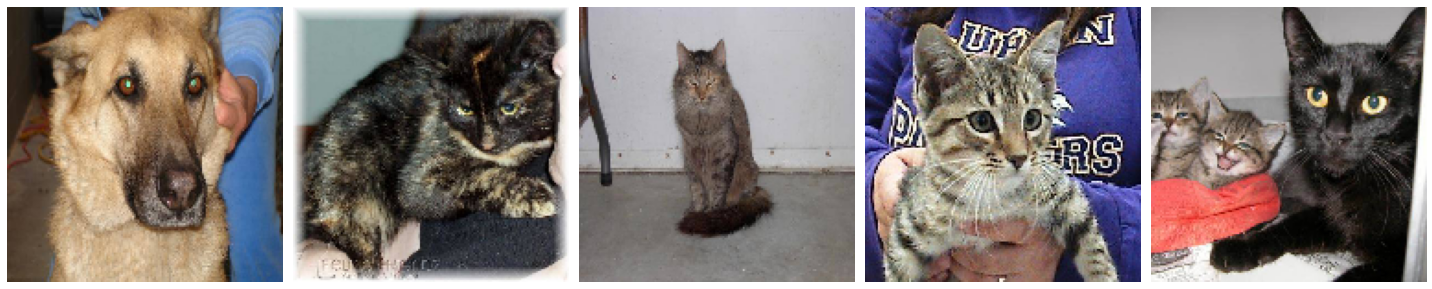

In [34]:
plotImages(sample_train_images[:5])

In [35]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [37]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_validation // batch_size,
)

/usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
15/15 [==============================] - 50s 3s/step - loss: 0.8628 - accuracy: 0.4872 - val_loss: 0.6905 - val_accuracy: 0.6763
Epoch 2/20
15/15 [==============================] - 45s 3s/step - loss: 0.6844 - accuracy: 0.5887 - val_loss: 0.6697 - val_accuracy: 0.6272
Epoch 3/20
15/15 [==============================] - 45s 3s/step - loss: 0.6561 - accuracy: 0.6405 - val_loss: 0.6660 - val_accuracy: 0.5781
Epoch 4/20
15/15 [==============================] - 45s 3s/step - loss: 0.6485 - accuracy: 0.6271 - val_loss: 0.6422 - val_accuracy: 0.5859
Epoch 5/20
15/15 [==============================] - 45s 3s/step - loss: 0.6045 - accuracy: 0.6741 - val_loss: 0.5729 - val_accuracy: 0.6830
Epoch 6/20
15/15 [==============================] - 45s 3s/step - loss: 0.5474 - accuracy: 0.7238 - val_loss: 0.4801 - val_accuracy: 0.7879
Epoch 7/20
15/15 [==============================] - 51s 3s/step - loss: 0.4827 - accuracy: 0.7698 - val_loss: 0.4281 - val_accuracy: 0.8080
Epoch 8/20
15/15 [==

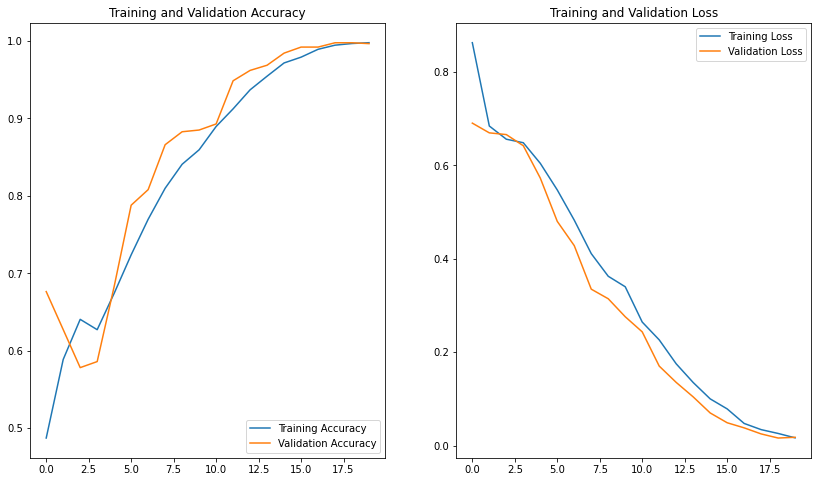

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [41]:
train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_WIDTH, IMG_HEIGHT)
)

Found 2000 images belonging to 2 classes.


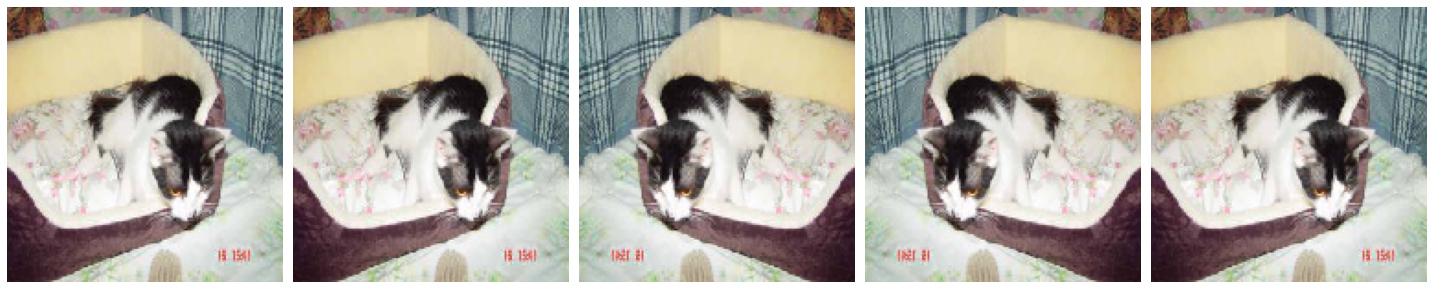

In [42]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [43]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [44]:
train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_WIDTH, IMG_HEIGHT)
)

Found 2000 images belonging to 2 classes.


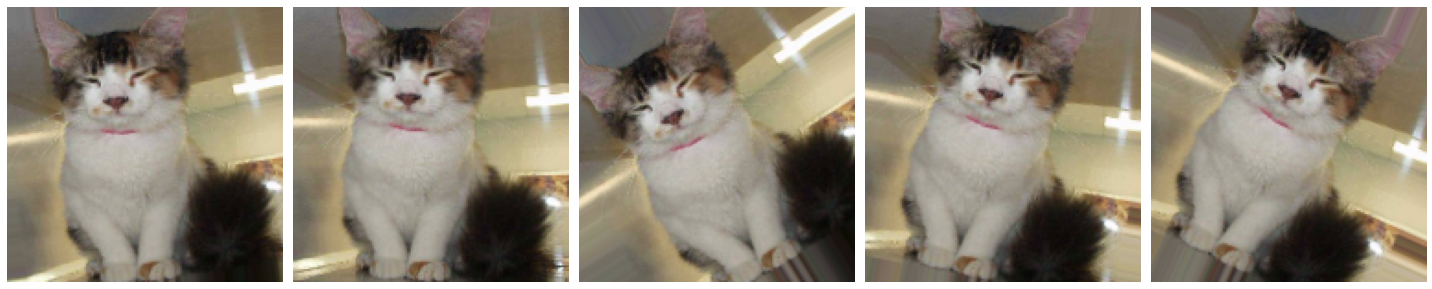

In [45]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [46]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [47]:
train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_WIDTH, IMG_HEIGHT)
)

Found 2000 images belonging to 2 classes.


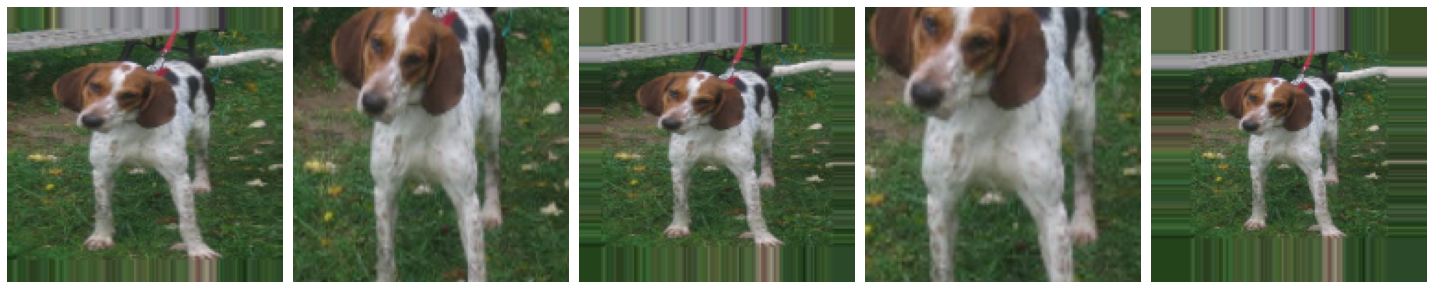

In [48]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [49]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

In [50]:
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_WIDTH, IMG_HEIGHT)
)

Found 2000 images belonging to 2 classes.


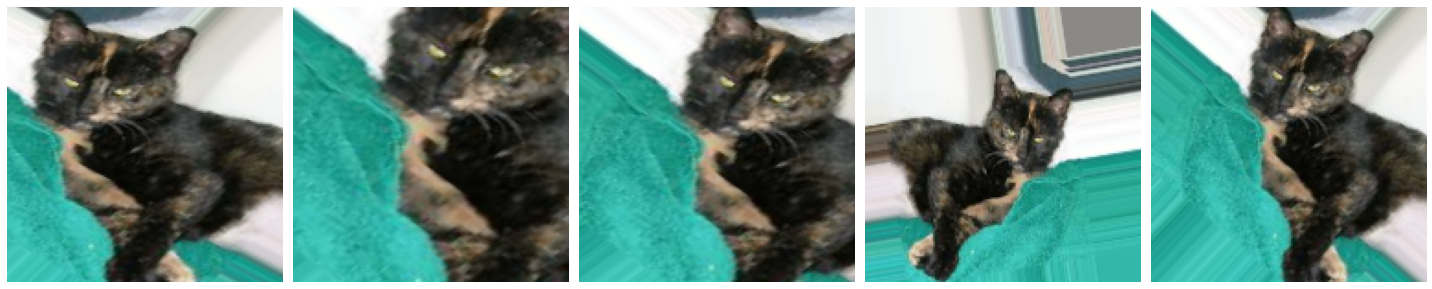

In [51]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [52]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [53]:
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [54]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [55]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [56]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_validation // batch_size
)

/usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
15/15 [==============================] - 56s 4s/step - loss: 1.0749 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5078
Epoch 2/20
15/15 [==============================] - 57s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 3/20
15/15 [==============================] - 55s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5145
Epoch 4/20
15/15 [==============================] - 55s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5089
Epoch 5/20
15/15 [==============================] - 56s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 6/20
15/15 [==============================] - 55s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 7/20
15/15 [==============================] - 49s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20
15/15 [==

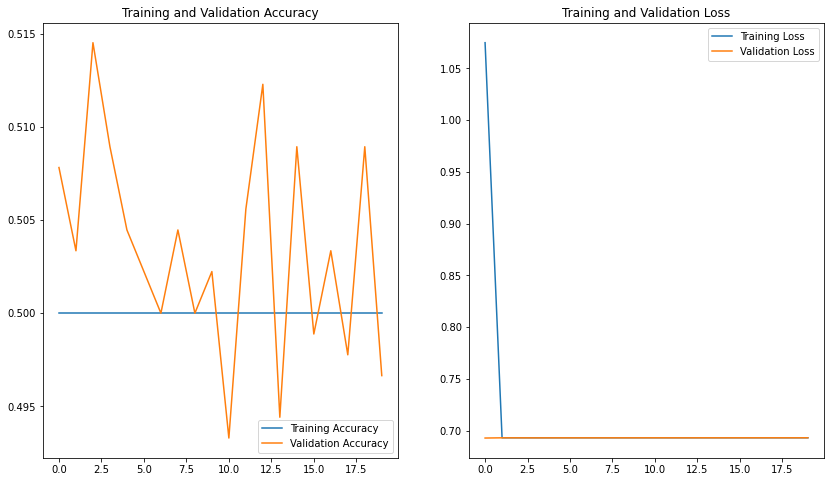

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()